In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# installing the keras tuner
# reference - https://www.youtube.com/watch?v=OzLAdpqm35E&t=704s
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 29.4 MB/s 
     |████████████████████████████████| 1.6 MB 82.6 MB/s 


In [ ]:
# import libraries
import tensorflow as tf
import timeit
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import time
import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import layers
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import MaxPooling1D
from keras.layers import Embedding
from keras.models import Model
from keras.utils.vis_utils import plot_model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
import os
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.offline as py
import plotly.express as px
from plotly import tools
import plotly.figure_factory as ff
import warnings
from matplotlib import pyplot as plt
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
from keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# unzip the dataset
import os
zip_path = os.path.join(os.path.join('drive', 'My Drive', 'Dissertation'), 'df_news_combined.csv.zip')
!cp '{zip_path}' .
!yes|unzip -q df_news_combined.csv.zip
!rm df_news_combined.csv.zip
print(os.listdir(os.path.join('drive', 'My Drive', 'Dissertation')))

['df_news_combined.csv.zip', 'trails.ipynb', 'naivebayes_base_and_tuned.ipynb', 'xgboost_base_and_tuned.ipynb', 'random_forest_base_and_tuned.ipynb', 'cnn_base_and_tuned.ipynb', 'gru_base_and_tuned.ipynb', 'lstm_base_and_tuned.ipynb', 'stochastic_gradient_descent_base_and_tuned', 'data_collection_and_data_cleaning.ipynb', 'data_visualisation.ipynb', 'mlp_base_and_tuned.ipynb']


In [ ]:
# read the dataset
df_news_com = pd.read_csv('df_news_combined.csv')
df_news_com

,TITLE,ARTICLE LINK,AUTHOR,PUBLISHER,COUNTRY,CATEGORY,LANGUAGE,DESCRIPTION,IMAGE URL,VIDEO URL,DATE,GMT,POSTAG
0,"""Business duo turn over $70K a month with thei...",https://www.dailymail.co.uk/femail/article-107...,Unknown,Mail Online,United Kingdom,Food,English,business duo create home hair kit bridge gap b...,https://i.dailymail.co.uk/1s/2022/04/29/05/571...,Unknown,05/01/2022,00:16,"[('business', 'NN'), ('duo', 'NN'), ('created'..."
1,"""People Are Sharing ""Impulsive And Expensive"" ...",https://www.buzzfeed.com/fabianabuontempo/peop...,Unknown,Buzzfeed,United Kingdom,Food,English,definitely need love make confident secure hap...,https://img.buzzfeed.com/buzzfeed-static/stati...,Unknown,05/01/2022,00:25,"[('definitely', 'RB'), ('need', 'MD'), ('love'..."
2,"""Why You Shouldn't Butter The Pan When Making ...",https://www.buzzfeed.com/rossyoder/culinary-sc...,Unknown,Buzzfeed,United Kingdom,Food,English,class session view entire post,https://img.buzzfeed.com/buzzfeed-static/stati...,Unknown,05/01/2022,00:25,"[('class', 'NN'), ('session', 'NN'), ('view', ..."
3,"""Quaint beachside cottage on the Mornington Pe...",https://www.dailymail.co.uk/femail/homes/artic...,Unknown,Mail Online,United Kingdom,Food,English,ultra chic contemporary home lap pool tennis c...,https://i.dailymail.co.uk/1s/2022/04/29/07/571...,Unknown,05/01/2022,00:53,"[('ultra', 'JJ'), ('chic', 'JJ'), ('contempora..."
4,"""Viral Tiktok claims Sunnyboys were back at Wo...",https://www.dailymail.co.uk/femail/food/articl...,Unknown,Mail Online,United Kingdom,Food,English,australian shoppers send spin tiktok clip go v...,https://i.dailymail.co.uk/1s/2022/05/01/02/572...,Unknown,05/01/2022,01:32,"[('australian', 'JJ'), ('shoppers', 'NNS'), ('..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
823100,"""'New Zealand condemns Russias annexation atte...",http://www.voxy.co.nz/politics/5/407843,Unknown,Voxy,New Zealand,Politics,English,new zealand condemn unequivocally russias atte...,Unknown,Unknown,30/09/2022,23:02,"[('new', 'JJ'), ('zealand', 'NNP'), ('condemns..."
823101,"""Nigeria @ 62: So far, not so good""",https://punchng.com/nigeria-62-so-far-not-so-g...,Our Reporters,Punch,Nigeria,Politics,English,leke baiyewu abiodun sanusi x ray political hi...,Unknown,Unknown,30/09/2022,23:25,"[('leke', 'NN'), ('baiyewu', 'NN'), ('abiodun'..."
823102,"""Most Voters Say Trump Should Not Be Allowed T...",https://www.huffpost.com/entry/voters-donald-t...,Unknown,Huffpost,United States Of America,Politics,English,apparently go give know ongoing investigations...,Unknown,Unknown,30/09/2022,23:25,"[('apparently', 'RB'), ('go', 'VB'), ('given',..."
823103,"""Babayemi congratulates Adeleke on Supreme Cou...",https://punchng.com/babayemi-congratulates-ade...,Bola Bamigbola,Punch,Nigeria,Politics,English,former governorship aspirant platform people d...,Unknown,Unknown,30/09/2022,23:44,"[('former', 'JJ'), ('governorship', 'NN'), ('a..."


In [ ]:
# reference - https://note.nkmk.me/en/python-pandas-nan-judge-count/
# checking for the missing values
df_news_com.isnull().sum()
# note - the reason this dataset is showing null values again beacause it is converted in the zip file, so the null values occured automatically even after doing the data cleaning.
# note - the code is been adapted from the reference and it is modified

TITLE            0
ARTICLE LINK     0
AUTHOR          27
PUBLISHER        0
COUNTRY          0
CATEGORY         0
LANGUAGE         0
DESCRIPTION     91
IMAGE URL        0
VIDEO URL        0
DATE             0
GMT              0
POSTAG           0
dtype: int64

In [ ]:
# reference - https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/
# replacing the null values with the unknown
df_news_com['AUTHOR'] = df_news_com['AUTHOR'].fillna('Unknown')
df_news_com['DESCRIPTION'] = df_news_com['DESCRIPTION'].fillna('Unknown')
# note - the code is been adapted from the reference and it is modified

In [ ]:
# reference - https://note.nkmk.me/en/python-pandas-nan-judge-count/
# checking for the missing values
df_news_com.isnull().sum()
# note - the code is been adapted from the reference and it is modified

TITLE           0
ARTICLE LINK    0
AUTHOR          0
PUBLISHER       0
COUNTRY         0
CATEGORY        0
LANGUAGE        0
DESCRIPTION     0
IMAGE URL       0
VIDEO URL       0
DATE            0
GMT             0
POSTAG          0
dtype: int64

In [ ]:
# getting the info
df_news_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823105 entries, 0 to 823104
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   TITLE         823105 non-null  object
 1   ARTICLE LINK  823105 non-null  object
 2   AUTHOR        823105 non-null  object
 3   PUBLISHER     823105 non-null  object
 4   COUNTRY       823105 non-null  object
 5   CATEGORY      823105 non-null  object
 6   LANGUAGE      823105 non-null  object
 7   DESCRIPTION   823105 non-null  object
 8   IMAGE URL     823105 non-null  object
 9   VIDEO URL     823105 non-null  object
 10  DATE          823105 non-null  object
 11  GMT           823105 non-null  object
 12  POSTAG        823105 non-null  object
dtypes: object(13)
memory usage: 81.6+ MB


In [ ]:
# reference - https://www.folkstalk.com/tech/create-new-dataframe-from-existing-dataframe-pandas-with-code-examples/
# creating separate dataframe of columns description and category
df_news_com1 = df_news_com[['DESCRIPTION', 'CATEGORY']].copy()
df_news_com1.head()
# note - the code is been adapted from the reference and it is modified

,DESCRIPTION,CATEGORY
0,business duo create home hair kit bridge gap b...,Food
1,definitely need love make confident secure hap...,Food
2,class session view entire post,Food
3,ultra chic contemporary home lap pool tennis c...,Food
4,australian shoppers send spin tiktok clip go v...,Food


In [ ]:
# reference - https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/
# label encoding the categories
label_encoder_category = preprocessing.LabelEncoder()
df_news_com1['CATEGORY']= label_encoder_category.fit_transform(df_news_com1['CATEGORY'])
df_news_com1.head()
# note - the code is been adapted from the reference and it is modified

,DESCRIPTION,CATEGORY
0,business duo create home hair kit bridge gap b...,3
1,definitely need love make confident secure hap...,3
2,class session view entire post,3
3,ultra chic contemporary home lap pool tennis c...,3
4,australian shoppers send spin tiktok clip go v...,3


In [ ]:
# reference - https://www.folkstalk.com/2022/10/number-of-total-words-in-cell-pandas-with-code-examples.html
# added the column sentence length which shows the length of the sentence
df_news_com1['SENTENCE_LENGTH'] = df_news_com1['DESCRIPTION'].apply(lambda x:len(str(x).split())) 
sentence_length_max = df_news_com1['SENTENCE_LENGTH'].max()
sentence_length_max
# note - the code is been adapted from the reference and it is modified

3732

### MLP Base Model

In [ ]:
# defining the independent and dependent features for mlp
X_mlp = df_news_com1['DESCRIPTION']
y_mlp = df_news_com1['CATEGORY']

In [ ]:
# printing the shape of the independent and dependent features for mlp
X_mlp.shape, y_mlp.shape

((823105,), (823105,))

In [ ]:
# reference - https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
# reference - https://austingwalters.com/classify-sentences-via-a-multilayer-perceptron-mlp/
# reference - https://machinelearningknowledge.ai/keras-tokenizer-tutorial-with-examples-for-fit_on_texts-texts_to_sequences-texts_to_matrix-sequences_to_matrix/
# this class makes it possible to "vectorize" a body of text by converting it into a series of numbers.
maximum_num_words = 1500
tokenizer = Tokenizer(num_words = maximum_num_words)
tokenizer.fit_on_texts(X_mlp)
X_mlp = tokenizer.texts_to_matrix(X_mlp,mode='count')
# note - the code is been adapted from the reference and it is modified


In [ ]:
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# splitting into training and testing
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X_mlp, y_mlp, test_size=0.2, shuffle = False , random_state = 0)
# note - the code is been adapted from the reference and it is modified

In [ ]:
# reference - https://stackoverflow.com/questions/61550026/valueerror-shapes-none-1-and-none-3-are-incompatible
# adding the categories on the output side
y_train_mlp = tf.keras.utils.to_categorical(y_train_mlp, num_classes=7)
y_test_mlp = tf.keras.utils.to_categorical(y_test_mlp, num_classes=7)
# note - the code is been adapted from the reference and it is modified
# note - I did this process because without adding the categories on the output side I was getting error.

In [ ]:
# printing the shape of the X_train and X_test for mlp
X_train_mlp.shape, X_test_mlp.shape

((658484, 1500), (164621, 1500))

In [ ]:
# printing the shape of the y_train and y_test for mlp
y_train_mlp.shape, y_test_mlp.shape

((658484, 7), (164621, 7))

In [ ]:
# reference - https://austingwalters.com/classify-sentences-via-a-multilayer-perceptron-mlp/
# reference - https://www.kaggle.com/code/sathianpong/3-ways-to-implement-mlp-with-keras/notebook
# create mlp base model
model_mlp = Sequential()
model_mlp.add(Dense(256, input_shape=(maximum_num_words,))) # first dense layer
model_mlp.add(Dropout(0.1))# first dropout layer
model_mlp.add(Dense(128,activation = 'relu')) # second dense layer
model_mlp.add(Dropout(0.1)) # second dropout layer
model_mlp.add(Dense(7,activation = 'sigmoid')) # second dense layer
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               384256    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 7)                 903       
                                                                 
Total params: 418,055
Trainable params: 418,055
Non-trainable params: 0
_________________________________________________________________


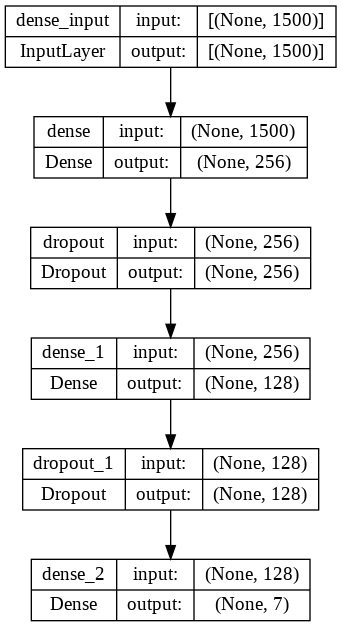

In [ ]:
# reference - https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/
# print the mlp base model
plot_model(model_mlp, to_file='model_plot_mlp.png', show_shapes=True, show_layer_names=True)
# note - the code is been adapted from the reference and it is modified.

In [ ]:
# applying the the loss, otimizer and training the model
model_mlp.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
mlp_start_time = time.time()
model_mlp_history = model_mlp.fit(X_train_mlp, y_train_mlp,
                     epochs=5,
                     verbose=False,
                     validation_split=0.1,
                     batch_size=512,callbacks=[EarlyStopping(patience=100)])
mlp_stop_time = time.time()
# note - the code is been adapted from my gru code and it is modified

In [ ]:
 # training loss and training accuracy of the mlp base model
 loss, accuracy = model_mlp.evaluate(X_train_mlp, y_train_mlp)
 # note - the code is been adapted from my gru code and it is modified

20578/20578 [==============================] - 40s 2ms/step - loss: 0.3273 - accuracy: 0.8859


In [ ]:
# reference - https://plotly.com/python/line-and-scatter/
# reference - https://plotly.com/python/reference/layout/
# reference - https://www.kaggle.com/code/sercanyesiloz/plotly-tutorial/notebook#Line%20Charts
# reference - https://linuxhint.com/plotly-graph-objects-scatter/
# plotting the training loss
mlp_model_training_loss = model_mlp_history.history['loss']
epochs = [1,2,3,4,5]
df_model_mlp_history = go.Scatter(x = epochs,
                     y = mlp_model_training_loss ,
                     mode="markers+lines",
                     marker = dict(color = 'red'))
mlp_layout = go.Layout(title={'text' : 'MLP MODEL TRAINING LOSS'},xaxis=dict(title = 'EPOCHS'),yaxis=dict(title='TRAINING LOSS'),
                   template = 'plotly_dark')


fig = go.Figure(data = df_model_mlp_history,layout=mlp_layout)
fig.update_layout(width=500,
    height=500
)
iplot(fig)
# note - the code is been adapted from the references and it is modified

In [ ]:
# reference - https://plotly.com/python/line-and-scatter/
# reference - https://plotly.com/python/reference/layout/
# reference - https://www.kaggle.com/code/sercanyesiloz/plotly-tutorial/notebook#Line%20Charts
# reference - https://linuxhint.com/plotly-graph-objects-scatter/
# plotting the training accuracy
mlp_model_training_accuracy = model_mlp_history.history['accuracy']
epochs = [1,2,3,4,5]
df_model_mlp_history = go.Scatter(x = epochs,
                     y = mlp_model_training_accuracy ,
                     mode="markers+lines",
                     marker = dict(color = 'limegreen'))
sentiment_country_layout = go.Layout(title={'text' : 'MLP MODEL TRAINING ACCURACY'},xaxis=dict(title = 'EPOCHS'),yaxis=dict(title='TRAINING ACCURACY'),
                   template = 'plotly_dark')


fig = go.Figure(data = df_model_mlp_history,layout=sentiment_country_layout)
fig.update_layout(width=500,
    height=500
)
iplot(fig)
# note - the code is been adapted from the references and it is modified

In [ ]:
# predict the train side of mlp base model
mlp_train_predict = model_mlp.predict(X_train_mlp)
# note - the code is been adapted from my gru code and it is modified

20578/20578 [==============================] - 26s 1ms/step


In [ ]:
# reference - https://datascience.stackexchange.com/questions/93751/valueerror-classification-metrics-cant-handle-a-mix-of-multilabel-indicator-an
y_train_mlp_arg = np.argmax(y_train_mlp,axis=1)
y_train_pred_mlp = np.argmax(mlp_train_predict,axis=1)
# note - the code is been adapted from the references and it is modified
# note - I added this code because I was getting the value error of mix multilabel

#### Training side of mlp model : getting precision,recall,f1,fbeta,mae,mse,rmse,training time


In [ ]:
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
# generating the classification report
from sklearn import metrics
print(metrics.classification_report(y_train_mlp_arg, y_train_pred_mlp))
# note - the code is been adapted from the reference and it is modified

              precision    recall  f1-score   support

           0       0.85      0.90      0.87    184194
           1       0.90      0.78      0.84    145217
           3       0.51      0.17      0.25      3756
           4       0.79      0.71      0.75     40210
           6       0.91      0.96      0.93    285107

    accuracy                           0.88    658484
   macro avg       0.79      0.71      0.73    658484
weighted avg       0.88      0.88      0.88    658484



In [ ]:
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
# calculate the accuracy
print(metrics.accuracy_score(y_train_mlp_arg, y_train_pred_mlp))
# note - the code is been adapted from the references and it is modified

0.8839425103723098


In [ ]:
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# calculate the precision score
print(precision_score(y_train_mlp_arg, y_train_pred_mlp,average='macro'))
# note - the code is been adapted from the references and it is modified

0.7921560368056312


In [ ]:
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
# calculate the recall score
print(recall_score(y_train_mlp_arg, y_train_pred_mlp,average='macro'))
# note - the code is been adapted from the references and it is modified

0.7050044925773524


In [ ]:
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
# calculate the f1 score
print(f1_score(y_train_mlp_arg, y_train_pred_mlp,average='macro'))
# note - the code is been adapted from the references and it is modified

0.7304808160800582


In [ ]:
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html
# calculate the fbeta score
print(fbeta_score(y_train_mlp_arg, y_train_pred_mlp,average='macro', beta = 0.7))
# note - the code is been adapted from the references and it is modified

0.7444955098365315


In [ ]:
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
# calculate the MAE
print(mean_absolute_error(y_train_mlp_arg, y_train_pred_mlp))
# note - the code is been adapted from the references and it is modified

0.4310112318598478


In [ ]:
# calculate the MSE
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
print(mean_squared_error(y_train_mlp_arg, y_train_pred_mlp,squared=True))
# note - the code is been adapted from the references and it is modified
# note - the value for the rmse in report is written after calculating manually

2.0195297076314684


In [ ]:
# calculate the train time
training_time_mlp = mlp_stop_time - mlp_start_time
training_time_mlp

27.19750428199768

#### Testing side of mlp model : getting precision,recall,f1,fbeta,mae,mse,rmse


In [ ]:
# testing loss and testing accuracy of the mlp base model
# reference - https://realpython.com/python-keras-text-classification/
# reference - https://www.sicara.fr/blog-technique/hyperparameter-tuning-keras-tuner
loss,accuracy = model_mlp.evaluate(X_test_mlp, y_test_mlp)

5145/5145 [==============================] - 10s 2ms/step - loss: 6.1031 - accuracy: 0.5346


In [ ]:
# predict the mlp base model
mlp_test_predict = model_mlp.predict(X_test_mlp)

5145/5145 [==============================] - 7s 1ms/step


In [ ]:
# reference - https://datascience.stackexchange.com/questions/93751/valueerror-classification-metrics-cant-handle-a-mix-of-multilabel-indicator-an
y_test_mlp_arg = np.argmax(y_test_mlp,axis=1)
y_test_pred_mlp = np.argmax(mlp_test_predict,axis=1)
# note - the code is been adapted from the references and it is modified
# note - I added this code because I was getting the value error of mix multilabel

In [ ]:
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
# generating the classification report
from sklearn import metrics
print(metrics.classification_report(y_test_mlp_arg, y_test_pred_mlp))
# note - the code is been adapted from the reference and it is modified

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.95      0.73      0.83    119609
           2       0.00      0.00      0.00      7281
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00     37731
           6       0.00      0.00      0.00         0

    accuracy                           0.53    164621
   macro avg       0.14      0.10      0.12    164621
weighted avg       0.69      0.53      0.60    164621



In [ ]:
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
# calculate the accuracy
print(metrics.accuracy_score(y_test_mlp_arg, y_test_pred_mlp))
# note - the code is been adapted from the references and it is modified

0.5324897795542488


In [ ]:
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# calculate the precision score
print(precision_score(y_test_mlp_arg, y_test_pred_mlp,average='macro'))
# note - the code is been adapted from the references and it is modified

0.13558150217851614


In [ ]:
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
# calculate the recall score
print(recall_score(y_test_mlp_arg, y_test_pred_mlp,average='macro'))
# note - the code is been adapted from the references and it is modified

0.10469709040050737


In [ ]:
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
# calculate the f1 score
print(f1_score(y_test_mlp_arg, y_test_pred_mlp,average='macro'))
# note - the code is been adapted from the references and it is modified

0.11815441931683701


In [ ]:
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html
# calculate the fbeta score
print(fbeta_score(y_test_mlp_arg, y_test_pred_mlp,average='macro', beta = 0.7))
# note - the code is been adapted from the references and it is modified

0.12359190581656675


In [ ]:
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
# calculate the MAE
print(mean_absolute_error(y_test_mlp_arg, y_test_pred_mlp))
# note - the code is been adapted from the references and it is modified

1.5630448120227673


In [ ]:
# calculate the MSE
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
print(mean_squared_error(y_test_mlp_arg, y_test_pred_mlp,squared=True))
# note - the code is been adapted from the references and it is modified

6.774032474593157


In [ ]:
# calculate the RMSE
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
print(mean_squared_error(y_test_mlp_arg, y_test_pred_mlp,squared=False))
# note - the code is been adapted from the references and it is modified

2.602697153837372


### MLP Tuned Model

In [ ]:
# create the mlp tuned model
def create_model(hyper_para):
  mlp_model_tuned = keras.Sequential()
  mlp_model_tuned.add(Dense(256, input_shape=(maximum_num_words,)))
  mlp_model_tuned.add(Dropout(0.1))
  mlp_model_tuned.add(layers.Dense(units=hyper_para.Int('units',min_value = 64, max_value = 128, step = 64),activation = 'relu'))
  mlp_model_tuned.add(layers.Dense(7, activation='sigmoid'))
  mlp_model_tuned.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(hyper_para.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])),metrics=['accuracy'])
  return mlp_model_tuned
# note - this model is built by editing the gru model also taken the mlp base model structure

In [ ]:
# setting the hyperparameters for the hyperband
from kerastuner.tuners import Hyperband
mlp_hyperband_tuner = Hyperband(
    create_model,
    max_epochs= 1,
    hyperband_iterations=1,
    overwrite = True,
    objective = 'accuracy',
    factor = 2
)
mlp_hyperband_tuner.search_space_summary()
# note - the code is been adapted from my gru code and it is modified

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 128, 'step': 64, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
# create the earlystopping
early_stop_mlp = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy',patience=100)
# note - the code is been adapted from my gru code and it is modified

In [ ]:
# searching for best hyperparameters
mlp_hyperband_tuner.search(X_train_mlp, y_train_mlp, epochs=1, validation_split=0.1, callbacks=[early_stop_mlp],batch_size=512)
# note - the code is been adapted from my gru code and it is modified
# note - parameters are randomly chosen
# note - epoch only chosen 1 because the session was crashing repeatedly as the mlp also require huge amount of ram

Trial 1 Complete [00h 00m 08s]
accuracy: 0.8624313473701477

Best accuracy So Far: 0.8624313473701477
Total elapsed time: 00h 00m 08s


In [ ]:
# best hyperparameters
best_hyperparameters_mlp = mlp_hyperband_tuner.get_best_hyperparameters(num_trials=1)[0]
best_hyperparameters_mlp.values
# note - the code is been adapted from my gru code and it is modified

{'units': 128,
 'learning_rate': 0.001,
 'tuner/epochs': 1,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [ ]:
# creating 1st mlp model(epochs=10 and batch_size=512) with best hyperparameters
model_mlp_tuned1 = mlp_hyperband_tuner.hypermodel.build(best_hyperparameters_mlp)
model_mlp_tuned1_history = model_mlp_tuned1.fit(X_train_mlp, y_train_mlp,
                     epochs=10,
                     verbose=False,validation_split=0.1,
                     batch_size=512,callbacks=[EarlyStopping(monitor = 'accuracy',patience=100)])
# note - the code is been adapted from my gru code and it is modified
# note values for epochs and batch size is randomly chosen

In [ ]:
# training loss and training accuracy of the 1st tuned mlp model
loss, accuracy = model_mlp_tuned1.evaluate(X_train_mlp, y_train_mlp)
# note - the code is been adapted from my gru code and it is modified

20578/20578 [==============================] - 40s 2ms/step - loss: 0.2728 - accuracy: 0.9069


In [ ]:
# testing loss and testing accuracy of the 1st tuned mlp model
loss, accuracy = model_mlp_tuned1.evaluate(X_test_mlp, y_test_mlp)
# note - the code is been adapted from my gru code and it is modified

5145/5145 [==============================] - 10s 2ms/step - loss: 7.8467 - accuracy: 0.5348


In [ ]:
# creating 2nd mlp model(epochs=15 and batch_size=512) with best hyperparameters
model_mlp_tuned2 = mlp_hyperband_tuner.hypermodel.build(best_hyperparameters_mlp)
model_mlp_tuned2_history = model_mlp_tuned2.fit(X_train_mlp, y_train_mlp,
                     epochs=15,
                     verbose=False,validation_split=0.1,
                     batch_size=512,callbacks=[EarlyStopping(monitor = 'accuracy',patience=100)])
# note - the code is been adapted from my gru code and it is modified
# note values for epochs and batch size is randomly chosen

In [ ]:
# training loss and training accuracy of the 2nd tuned mlp model
loss, accuracy = model_mlp_tuned2.evaluate(X_train_mlp, y_train_mlp)
# note - the code is been adapted from my gru code and it is modified

20578/20578 [==============================] - 41s 2ms/step - loss: 0.2653 - accuracy: 0.9121


In [ ]:
# testing loss and testing accuracy of the 2nd tuned mlp model
loss, accuracy = model_mlp_tuned2.evaluate(X_test_mlp, y_test_mlp)
# note - the code is been adapted from my gru code and it is modified

5145/5145 [==============================] - 10s 2ms/step - loss: 11.0136 - accuracy: 0.4924


In [ ]:
# setting random search hyperparameters
from kerastuner.tuners import RandomSearch
mlp_randomsearch_tuner = RandomSearch(
    create_model,
    max_trials=3,
    objective='accuracy',
)
mlp_randomsearch_tuner.search_space_summary()
# note - the code is been adapted from my gru code and it is modified

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 128, 'step': 64, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
# create the earlystopping
early_stop_mlp1 = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy',patience=100)
# note - the code is been adapted from my gru code and it is modified

In [ ]:
# searching for best hyperparameters
mlp_randomsearch_tuner.search(X_train_mlp, y_train_mlp, epochs=1, validation_split=0.1, callbacks=[early_stop_mlp1],batch_size=512)
# note - the code is been adapted from my gru code and it is modified

Trial 3 Complete [00h 00m 08s]
accuracy: 0.8248449563980103

Best accuracy So Far: 0.8624313473701477
Total elapsed time: 00h 00m 15s


In [ ]:
# best hyperparameters
best_hyperparameters_mlp1 = mlp_randomsearch_tuner.get_best_hyperparameters(num_trials=1)[0]
best_hyperparameters_mlp1.values
# note - the code is been adapted from my gru code and it is modified

{'units': 128,
 'learning_rate': 0.001,
 'tuner/epochs': 1,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [ ]:
# creating 3rd mlp model(epochs=10 and batch_size=512) with best hyperparameters
model_mlp_tuned3 = mlp_randomsearch_tuner.hypermodel.build(best_hyperparameters_mlp1)
model_mlp_tuned3_history = model_mlp_tuned3.fit(X_train_mlp, y_train_mlp,
                     epochs=10,
                     verbose=False,
                     batch_size=512,callbacks=[EarlyStopping(monitor = 'accuracy',patience=100)])
# note - the code is been adapted from my gru code and it is modified
# note - the  values for batch size and epochs are randomly chosen

In [ ]:
# training loss and training accuracy of the 3rd tuned mlp model
loss, accuracy = model_mlp_tuned3.evaluate(X_train_mlp, y_train_mlp)
# note - the code is been adapted from my gru code and it is modified

20578/20578 [==============================] - 41s 2ms/step - loss: 0.2378 - accuracy: 0.9160


In [ ]:
# testing loss and testing accuracy of the 3rd tuned mlp model
loss, accuracy = model_mlp_tuned3.evaluate(X_test_mlp, y_test_mlp)
# note - the code is been adapted from my gru code and it is modified

5145/5145 [==============================] - 10s 2ms/step - loss: 8.5912 - accuracy: 0.5839


In [ ]:
# creating 4th mlp model(epochs=15 and batch_size=512) with best hyperparameters
model_mlp_tuned4 = mlp_randomsearch_tuner.hypermodel.build(best_hyperparameters_mlp1)
model_mlp_tuned4_history = model_mlp_tuned4.fit(X_train_mlp, y_train_mlp,
                     epochs=15,
                     verbose=False,
                     batch_size=512,callbacks=[EarlyStopping(monitor = 'accuracy',patience=100)])
# note - the code is been adapted from my gru code and it is modified
# note - the  values for batch size and epochs are randomly chosen

In [ ]:
# training loss and training accuracy of the 4th tuned mlp model
loss, accuracy = model_mlp_tuned4.evaluate(X_train_mlp, y_train_mlp)
# note - the code is been adapted from my gru code and it is modified

20578/20578 [==============================] - 41s 2ms/step - loss: 0.2043 - accuracy: 0.9281


In [ ]:
# testing loss and testing accuracy of the 4th tuned mlp model
loss, accuracy = model_mlp_tuned4.evaluate(X_test_mlp, y_test_mlp)
# note - the code is been adapted from my gru code and it is modified

5145/5145 [==============================] - 10s 2ms/step - loss: 11.2806 - accuracy: 0.5834
